# Data Preparation

In [1]:
# Datasource: http://rstudio-pubs-static.s3.amazonaws.com/4411_b5d77e893fb347ccb0e5171c12aaf4a0.html

In [2]:
import csv
import requests
import pandas as pd

CSV_URL = 'https://spark-public.s3.amazonaws.com/dataanalysis/loansData.csv'

with requests.Session() as s:
    download = s.get(CSV_URL)
    decoded_content = download.content.decode('utf-8')
    cr = csv.reader(decoded_content.splitlines(), delimiter=',')
    my_list = list(cr)

In [3]:
dataSet = pd.DataFrame(my_list)
dataSet.columns = ["Index", "Amount.Requested", "Amount.Funded.By.Investors", "Interest.Rate", "Loan.Length", "Loan.Purpose","Debt.To.Income.Ratio","State", "Home.Ownership", "Monthly.Income", "FICO.Range","Open.CREDIT.Lines","Revolving.CREDIT.Balance", "Inquiries.in.the.Last.6.Months","Employment.Length"]
dataSet = dataSet.iloc[1:]
dataSet = dataSet.drop('Index', 1)
dataSet.columns = dataSet.columns.str.replace(".", "")
dataSet.head()

,AmountRequested,AmountFundedByInvestors,InterestRate,LoanLength,LoanPurpose,DebtToIncomeRatio,State,HomeOwnership,MonthlyIncome,FICORange,OpenCREDITLines,RevolvingCREDITBalance,InquiriesintheLast6Months,EmploymentLength
1,20000,20000,8.90%,36 months,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14,14272,2,< 1 year
2,19200,19200,12.12%,36 months,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12,11140,1,2 years
3,35000,35000,21.98%,60 months,debt_consolidation,23.81%,CA,MORTGAGE,11500,690-694,14,21977,1,2 years
4,10000,9975,9.99%,36 months,debt_consolidation,14.30%,KS,MORTGAGE,3833.33,695-699,10,9346,0,5 years
5,12000,12000,11.71%,36 months,credit_card,18.78%,NJ,RENT,3195,695-699,11,14469,0,9 years


In [5]:
dataSet = dataSet.convert_objects(convert_numeric=True)

C:\Users\ossi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


In [6]:
dataSet = pd.DataFrame(dataSet)

In [7]:
# Turns FICOs into numeric values
for i in range(0, len(dataSet)):
    #print(int(dataSet['FICORange'].iloc[i][:3]) + 2)
    dataSet['FICORange'].iloc[i] = int(dataSet['FICORange'].iloc[i][:3]) + 2

C:\Users\ossi\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [8]:
dataSet.head()

,AmountRequested,AmountFundedByInvestors,InterestRate,LoanLength,LoanPurpose,DebtToIncomeRatio,State,HomeOwnership,MonthlyIncome,FICORange,OpenCREDITLines,RevolvingCREDITBalance,InquiriesintheLast6Months,EmploymentLength
1,20000,20000.0,8.90%,36 months,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,737,14.0,14272.0,2.0,< 1 year
2,19200,19200.0,12.12%,36 months,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,717,12.0,11140.0,1.0,2 years
3,35000,35000.0,21.98%,60 months,debt_consolidation,23.81%,CA,MORTGAGE,11500.00,692,14.0,21977.0,1.0,2 years
4,10000,9975.0,9.99%,36 months,debt_consolidation,14.30%,KS,MORTGAGE,3833.33,697,10.0,9346.0,0.0,5 years
5,12000,12000.0,11.71%,36 months,credit_card,18.78%,NJ,RENT,3195.00,697,11.0,14469.0,0.0,9 years


In [9]:
# takes months off of loan length. Turns it into numeric variable
for i in range(0, len(dataSet)):
    #print(int(dataSet['LoanLength'].iloc[i][:2]))
    dataSet['LoanLength'].iloc[i] = int(dataSet['LoanLength'].iloc[i][:2])

C:\Users\ossi\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [10]:
# Gets rid of null employment lengths
dataSet = dataSet[dataSet.EmploymentLength != 'n/a']

In [11]:
# Gets rid of percentage sign on D/I ratio
for i in range(0, len(dataSet)):
    dataSet['DebtToIncomeRatio'].iloc[i] = float(dataSet['DebtToIncomeRatio'].iloc[i][:-1])

C:\Users\ossi\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [12]:
# Gets rid of percentage sign on interest rate
for i in range(0, len(dataSet)):
    dataSet['InterestRate'].iloc[i] = float(dataSet['InterestRate'].iloc[i][:-1])

C:\Users\ossi\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [13]:
# takes years off of employment length. Turns it into numeric variable
for i in range(0, len(dataSet)):
    value = dataSet['EmploymentLength'].iloc[i][:1]
    if value == '<':
        dataSet['EmploymentLength'].iloc[i] = int(1)
    else:
        dataSet['EmploymentLength'].iloc[i] = int(value)

C:\Users\ossi\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [14]:
import numpy as np
dataSet = dataSet[np.isfinite(dataSet['MonthlyIncome'])]
dataSet = dataSet[np.isfinite(dataSet['OpenCREDITLines'])]

In [15]:
# This might be redundant relative to the fact that we can simply loop through the columns and get unique values 
def uniqueValues(colName):
    uniVals = [dataSet[colName].unique()]
    uniqueValues = []
    for i in range(0, len(uniVals[0])):
        #print(uniVals[0][i])
        uniqueValues.append(uniVals[0][i])
    return uniqueValues

# Data Exploration

In [16]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [17]:
# Loans split by Loan length
differentiatedValues = uniqueValues('LoanLength') 
print(differentiatedValues)

[36, 60]


In [18]:
# loanLengthDatasets
shortLoan = dataSet[dataSet['LoanLength'] == 36]
longLoan = dataSet[dataSet['LoanLength'] == 60]

In [19]:
metrics = ['FICORange', 'InterestRate', 'DebtToIncomeRatio', 'AmountRequested', 'MonthlyIncome', 'OpenCREDITLines', 'RevolvingCREDITBalance', 'InquiriesintheLast6Months', 'EmploymentLength']

In [20]:
def average(data):
    for j in range(0, len(metrics)):
        metricSum = 0
        for i in range(0, len(data)):
            metricSum += int(data[metrics[j]].iloc[i])
        print(metrics[j], ":", metricSum / len(data))

In [21]:
loanLengthDatasets = [shortLoan, longLoan]

In [22]:
for l in range(0, len(loanLengthDatasets)):
    print(loanLengthDatasets[l]['LoanLength'].iloc[0])
    average(loanLengthDatasets[l])

36
FICORange : 707.5891719745223
InterestRate : 11.65180467091295
DebtToIncomeRatio : 14.78927813163482
AmountRequested : 10794.811571125265
MonthlyIncome : 5589.484607218684
OpenCREDITLines : 10.02176220806794
RevolvingCREDITBalance : 14786.0
InquiriesintheLast6Months : 0.8927813163481954
EmploymentLength : 3.0477707006369426
60
FICORange : 708.8994413407821
InterestRate : 15.845437616387336
DebtToIncomeRatio : 15.266294227188082
AmountRequested : 18464.94413407821
MonthlyIncome : 6249.934823091247
OpenCREDITLines : 10.409683426443204
RevolvingCREDITBalance : 17231.392923649906
InquiriesintheLast6Months : 0.9534450651769087
EmploymentLength : 3.1396648044692737


In [23]:
differentiatedValues = uniqueValues('LoanPurpose') 
print(differentiatedValues)

['debt_consolidation', 'credit_card', 'other', 'moving', 'car', 'vacation', 'home_improvement', 'house', 'major_purchase', 'educational', 'medical', 'wedding', 'small_business', 'renewable_energy']


In [24]:
# loanPurposeDatasets
debt_consolidation = dataSet[dataSet['LoanPurpose'] == 'debt_consolidation']
credit_card = dataSet[dataSet['LoanPurpose'] == 'credit_card']
other = dataSet[dataSet['LoanPurpose'] == 'other']
moving = dataSet[dataSet['LoanPurpose'] == 'moving']
car = dataSet[dataSet['LoanPurpose'] == 'car']
vacation = dataSet[dataSet['LoanPurpose'] == 'vacation']
home_improvement = dataSet[dataSet['LoanPurpose'] == 'home_improvement']
house = dataSet[dataSet['LoanPurpose'] == 'house']
major_purchase = dataSet[dataSet['LoanPurpose'] == 'major_purchase']
educational = dataSet[dataSet['LoanPurpose'] == 'educational']
medical = dataSet[dataSet['LoanPurpose'] == 'medical']
wedding = dataSet[dataSet['LoanPurpose'] == 'wedding']
small_business = dataSet[dataSet['LoanPurpose'] == 'small_business']
renewable_energy = dataSet[dataSet['LoanPurpose'] == 'renewable_energy']

In [25]:
loanPurposeDatasets = [debt_consolidation, credit_card, other, moving, car, vacation, home_improvement, house, major_purchase, educational, medical, wedding, small_business, renewable_energy]

In [26]:
for p in range(0, len(loanPurposeDatasets)):
    print(loanPurposeDatasets[p]['LoanPurpose'].iloc[0])
    average(loanPurposeDatasets[p])

debt_consolidation
FICORange : 704.0836621941594
InterestRate : 13.109707971586424
DebtToIncomeRatio : 15.789265982636149
AmountRequested : 13902.111286503552
MonthlyIncome : 5761.9147592738755
OpenCREDITLines : 10.501183898973954
RevolvingCREDITBalance : 15808.629834254143
InquiriesintheLast6Months : 0.8997632202052092
EmploymentLength : 3.0765588003157065
credit_card
FICORange : 701.7563805104409
InterestRate : 12.547563805104408
DebtToIncomeRatio : 16.34570765661253
AmountRequested : 12370.127610208816
MonthlyIncome : 5405.547563805105
OpenCREDITLines : 10.879350348027842
RevolvingCREDITBalance : 19402.721577726217
InquiriesintheLast6Months : 0.7749419953596288
EmploymentLength : 3.176334106728538
other
FICORange : 707.0793650793651
InterestRate : 12.756613756613756
DebtToIncomeRatio : 13.767195767195767
AmountRequested : 8739.153439153439
MonthlyIncome : 5220.587301587301
OpenCREDITLines : 8.798941798941799
RevolvingCREDITBalance : 12313.243386243386
InquiriesintheLast6Months : 1.0

In [27]:
differentiatedValues = uniqueValues('State') 
print(differentiatedValues)

['SC', 'TX', 'CA', 'KS', 'NJ', 'CT', 'MA', 'LA', 'FL', 'DC', 'OH', 'AL', 'AZ', 'GA', 'WV', 'NH', 'VA', 'NY', 'MD', 'HI', 'PA', 'WA', 'IL', 'NC', 'WI', 'SD', 'AK', 'DE', 'MN', 'MO', 'RI', 'CO', 'NM', 'MI', 'OK', 'NV', 'UT', 'AR', 'KY', 'VT', 'OR', 'IA', 'MT', 'IN', 'WY', 'MS']


In [28]:
# stateDatasets
SC = dataSet[dataSet['State'] == 'SC']
TX = dataSet[dataSet['State'] == 'TX']
CA = dataSet[dataSet['State'] == 'CA']
KS = dataSet[dataSet['State'] == 'KS']
NJ = dataSet[dataSet['State'] == 'NJ']
CT = dataSet[dataSet['State'] == 'CT']
MA = dataSet[dataSet['State'] == 'MA']
LA = dataSet[dataSet['State'] == 'LA']
FL = dataSet[dataSet['State'] == 'FL']
DC = dataSet[dataSet['State'] == 'DC']
OH = dataSet[dataSet['State'] == 'OH']
AL = dataSet[dataSet['State'] == 'AL']
AZ = dataSet[dataSet['State'] == 'AZ']
GA = dataSet[dataSet['State'] == 'GA']
WV = dataSet[dataSet['State'] == 'WV']
NH = dataSet[dataSet['State'] == 'NH']
VA = dataSet[dataSet['State'] == 'VA']
NY = dataSet[dataSet['State'] == 'NY']
HI = dataSet[dataSet['State'] == 'HI']
MD = dataSet[dataSet['State'] == 'MD']
PA = dataSet[dataSet['State'] == 'PA']
WA = dataSet[dataSet['State'] == 'WA']
IL = dataSet[dataSet['State'] == 'IL']
NC = dataSet[dataSet['State'] == 'NC']
WI = dataSet[dataSet['State'] == 'WI']
SD = dataSet[dataSet['State'] == 'SD']
AK = dataSet[dataSet['State'] == 'AK']
DE = dataSet[dataSet['State'] == 'DE']
MN = dataSet[dataSet['State'] == 'MN']
MO = dataSet[dataSet['State'] == 'MO']
RI = dataSet[dataSet['State'] == 'RI']
CO = dataSet[dataSet['State'] == 'CO']
NM = dataSet[dataSet['State'] == 'NM']
MI = dataSet[dataSet['State'] == 'MI']
OK = dataSet[dataSet['State'] == 'OK']
NV = dataSet[dataSet['State'] == 'NV']
UT = dataSet[dataSet['State'] == 'UT']
AR = dataSet[dataSet['State'] == 'AR']
KY = dataSet[dataSet['State'] == 'KY']
VT = dataSet[dataSet['State'] == 'VT']
OR = dataSet[dataSet['State'] == 'OR']
IA = dataSet[dataSet['State'] == 'IA']
MT = dataSet[dataSet['State'] == 'MT']
IN = dataSet[dataSet['State'] == 'IN']
WY = dataSet[dataSet['State'] == 'WY']
MS = dataSet[dataSet['State'] == 'MS']

In [29]:
stateDatasets = [SC, TX, CA, KS, NJ, CT, MA, LA, FL, DC, OH, AL, AZ, GA, WV, NH, VA, NY, MD, HI, PA, WA, IL, NC, WI, SD, AK, DE, MN, MO, RI, CO, NM, MI, OK, NV, UT, AR, KY, VT, OR, IA, MT, IN, WY, MS]

In [30]:
for s in range(0, len(stateDatasets)):
    print(stateDatasets[s]['State'].iloc[0])
    average(stateDatasets[s])

SC
FICORange : 706.8076923076923
InterestRate : 12.076923076923077
DebtToIncomeRatio : 15.923076923076923
AmountRequested : 10745.192307692309
MonthlyIncome : 5714.807692307692
OpenCREDITLines : 9.692307692307692
RevolvingCREDITBalance : 9690.961538461539
InquiriesintheLast6Months : 0.8846153846153846
EmploymentLength : 3.3076923076923075
TX
FICORange : 708.3157894736842
InterestRate : 12.935672514619883
DebtToIncomeRatio : 16.5906432748538
AmountRequested : 12811.40350877193
MonthlyIncome : 5532.251461988304
OpenCREDITLines : 10.631578947368421
RevolvingCREDITBalance : 13815.152046783625
InquiriesintheLast6Months : 0.8830409356725146
EmploymentLength : 2.8304093567251463
CA
FICORange : 706.6531100478469
InterestRate : 12.45933014354067
DebtToIncomeRatio : 13.897129186602871
AmountRequested : 12298.265550239234
MonthlyIncome : 5833.093301435407
OpenCREDITLines : 9.767942583732058
RevolvingCREDITBalance : 15393.66985645933
InquiriesintheLast6Months : 0.7822966507177034
EmploymentLength 

AmountRequested : 11493.333333333334
MonthlyIncome : 6181.933333333333
OpenCREDITLines : 12.4
RevolvingCREDITBalance : 19046.866666666665
InquiriesintheLast6Months : 1.0
EmploymentLength : 2.8666666666666667
CO
FICORange : 709.6315789473684
InterestRate : 12.526315789473685
DebtToIncomeRatio : 15.912280701754385
AmountRequested : 12727.631578947368
MonthlyIncome : 5234.0
OpenCREDITLines : 10.192982456140351
RevolvingCREDITBalance : 12675.315789473685
InquiriesintheLast6Months : 1.0350877192982457
EmploymentLength : 3.2982456140350878
NM
FICORange : 712.8333333333334
InterestRate : 13.416666666666666
DebtToIncomeRatio : 18.666666666666668
AmountRequested : 14341.666666666666
MonthlyIncome : 5456.333333333333
OpenCREDITLines : 9.833333333333334
RevolvingCREDITBalance : 18172.416666666668
InquiriesintheLast6Months : 0.9166666666666666
EmploymentLength : 2.5833333333333335
MI
FICORange : 692.2272727272727
InterestRate : 14.0
DebtToIncomeRatio : 16.886363636363637
AmountRequested : 12436.93

In [31]:
differentiatedValues = uniqueValues('HomeOwnership') 
print(differentiatedValues)

['MORTGAGE', 'RENT', 'OWN', 'OTHER']


In [32]:
# HomeOwnershipDatasets
MORTGAGE = dataSet[dataSet['HomeOwnership'] == 'MORTGAGE']
RENT = dataSet[dataSet['HomeOwnership'] == 'RENT']
OWN = dataSet[dataSet['HomeOwnership'] == 'OWN']
OTHER = dataSet[dataSet['HomeOwnership'] == 'OTHER']

In [33]:
homeOwnershipDatasets = [MORTGAGE, RENT, OWN, OTHER]

In [34]:
for h in range(0, len(homeOwnershipDatasets)):
    print(homeOwnershipDatasets[h]['HomeOwnership'].iloc[0])
    average(homeOwnershipDatasets[h])

MORTGAGE
FICORange : 713.4061096136568
InterestRate : 12.28930817610063
DebtToIncomeRatio : 14.88230008984726
AmountRequested : 13815.1841868823
MonthlyIncome : 6679.274932614555
OpenCREDITLines : 10.881401617250674
RevolvingCREDITBalance : 19077.865229110514
InquiriesintheLast6Months : 1.0188679245283019
EmploymentLength : 3.1024258760107815
RENT
FICORange : 702.3052064631956
InterestRate : 12.896768402154398
DebtToIncomeRatio : 14.788150807899461
AmountRequested : 11369.681328545781
MonthlyIncome : 4941.482944344703
OpenCREDITLines : 9.335727109515261
RevolvingCREDITBalance : 11669.183123877918
InquiriesintheLast6Months : 0.8052064631956912
EmploymentLength : 3.0547576301615798
OWN
FICORange : 709.0899470899471
InterestRate : 12.37037037037037
DebtToIncomeRatio : 15.613756613756614
AmountRequested : 11443.650793650793
MonthlyIncome : 4868.312169312169
OpenCREDITLines : 9.989417989417989
RevolvingCREDITBalance : 14431.153439153439
InquiriesintheLast6Months : 0.8253968253968254
Employm

In [35]:
dataCorrelations = dataSet.corr().unstack().sort_values().drop_duplicates()

In [36]:
dataCorrelationsFICORange = dataCorrelations['FICORange'] 

In [37]:
dataCorrelationsFICORange

InquiriesintheLast6Months   -0.093090
OpenCREDITLines             -0.091757
EmploymentLength            -0.021282
RevolvingCREDITBalance      -0.000684
AmountFundedByInvestors      0.079339
AmountRequested              0.088707
dtype: float64

# Dropping Outliers

# https://github.com/max-fitzpatrick/Credit-scoring-model/blob/master/CREDIT_SCORING_NOTEBOOK.ipynb

# https://github.com/IdoZehori/Credit_Score/blob/master/Credit%20score.ipynb

# ROC Curve needed for classification implementations such as these

# Machine Learning

# KNN Classifier - Interest Rates

In [157]:
dataSetNoText = dataSet[['AmountRequested', 'AmountFundedByInvestors', 'InterestRate', 'LoanLength', 'DebtToIncomeRatio',  'MonthlyIncome', 'FICORange', 'OpenCREDITLines', 'RevolvingCREDITBalance', 'InquiriesintheLast6Months', 'EmploymentLength']]
dataSetNoText.head()

,AmountRequested,AmountFundedByInvestors,InterestRate,LoanLength,DebtToIncomeRatio,MonthlyIncome,FICORange,OpenCREDITLines,RevolvingCREDITBalance,InquiriesintheLast6Months,EmploymentLength
1,20000,20000.0,8.9,36,14.9,6541.67,737,14.0,14272.0,2.0,1
2,19200,19200.0,12.12,36,28.36,4583.33,717,12.0,11140.0,1.0,2
3,35000,35000.0,21.98,60,23.81,11500.00,692,14.0,21977.0,1.0,2
4,10000,9975.0,9.99,36,14.3,3833.33,697,10.0,9346.0,0.0,5
5,12000,12000.0,11.71,36,18.78,3195.00,697,11.0,14469.0,0.0,9


In [39]:
dataSetNoText = dataSetNoText.convert_objects(convert_numeric=True)

C:\Users\ossi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


In [40]:
# Average interest rate
iRateSum = []
for i in range(0, len(dataSetNoText['InterestRate'])):
    iRateSum.append(dataSetNoText['InterestRate'].iloc[i])
averageInterestRate = pd.DataFrame(iRateSum)
print(float(averageInterestRate.mean()))

13.077265592730416


In [159]:
#iRate = {dataSetNoText.InterestRate.values <= float(averageInterestRate.mean(): 1, dataSetNoText.InterestRate.values >= float(averageInterestRate.mean(): 0}
dataSetNoText['iRateBinary'] = np.where(dataSetNoText['InterestRate'] >= float(averageInterestRate.mean()), 1, 0)

C:\Users\ossi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [160]:
dataSetNoText.head()

,AmountRequested,AmountFundedByInvestors,InterestRate,LoanLength,DebtToIncomeRatio,MonthlyIncome,FICORange,OpenCREDITLines,RevolvingCREDITBalance,InquiriesintheLast6Months,EmploymentLength,iRateBinary
1,20000,20000.0,8.9,36,14.9,6541.67,737,14.0,14272.0,2.0,1,0
2,19200,19200.0,12.12,36,28.36,4583.33,717,12.0,11140.0,1.0,2,0
3,35000,35000.0,21.98,60,23.81,11500.00,692,14.0,21977.0,1.0,2,1
4,10000,9975.0,9.99,36,14.3,3833.33,697,10.0,9346.0,0.0,5,0
5,12000,12000.0,11.71,36,18.78,3195.00,697,11.0,14469.0,0.0,9,0


In [167]:
iRateCorrelations = dataSetNoText.corr().unstack().sort_values().drop_duplicates()

In [168]:
iRateCorrelationsInterestRateBinary = iRateCorrelations['iRateBinary'] 

In [169]:
iRateCorrelationsInterestRateBinary

MonthlyIncome             -0.021063
EmploymentLength           0.028692
OpenCREDITLines            0.062211
AmountRequested            0.207609
AmountFundedByInvestors    0.212538
dtype: float64

In [191]:
col_list = ['FICORange', 'DebtToIncomeRatio', 'iRateBinary']

df = dataSetNoText[col_list]

from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(df)
df = pd.DataFrame(np_scaled)
df.columns = ['FICORange', 'DebtToIncomeRatio', 'iRateBinary']

from sklearn.model_selection import train_test_split 
train_features, test_features, train_outcome, test_outcome = train_test_split(
    df.drop('iRateBinary', axis=1),
    df.iRateBinary,
    test_size = .2, 
    random_state = 7
)

train_features = train_features.reset_index(drop=True)
train_outcome = train_outcome.reset_index(drop=True)
test_features = test_features.reset_index(drop=True)
test_outcome = test_outcome.reset_index(drop=True)

In [192]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

w, h = 2, 10;
KNNresults = [[0 for x in range(w)] for y in range(h)] 

# Loop from values 1 - 10 to find the best k value 
for x in range(1, 11):
    print(x)
    KNNresults[x - 1][0] = x
    # parameters optional
    knn = KNeighborsClassifier(n_neighbors=x)
    # fitting the model
    knn.fit(train_features, train_outcome)
    # predict the response
    pred = knn.predict(test_features)
    # evaluate accuracy
    print (accuracy_score(test_outcome, pred))
    KNNresults[x - 1][1] = accuracy_score(test_outcome, pred)

1
0.7257731958762886
2
0.7010309278350515
3
0.7525773195876289
4
0.7525773195876289
5
0.7628865979381443
6
0.7814432989690722
7
0.7793814432989691
8
0.7731958762886598
9
0.7876288659793814
10
0.7752577319587629


# KNN Classifier - FICO Scores

In [193]:
# Count prevalance of FICO scores

items = []

for i in range(len(dataSetNoText['FICORange'])):
    feature = dataSetNoText['FICORange'].iloc[i]
    items.append(feature)        
items

from collections import Counter
#list1 = [13, 19, 13, 2, 16, 6, 5, 19, 20, 21, 20, 13, 19, 13, 16]
c = Counter(items)
# print(c)
df = pd.DataFrame.from_dict(c, orient='index').reset_index()
df = df.rename(columns={'index':'FICO_Score', 0:'Count'})
#df["FreqByYear "] = round(df['Count'] / 6, 2) 
df = df.sort_values(by='Count', ascending=False)
# print(df['Count'].sum()) - Use to verify data transfer process
df

,FICO_Score,Count
4,672,168
13,677,161
22,682,157
3,697,146
8,667,138
2,692,136
6,707,131
7,687,130
21,702,124
17,662,119


In [194]:
# Average FICO Score
FICOScoreSum = []
for i in range(0, len(dataSetNoText['FICORange'])):
    FICOScoreSum.append(dataSetNoText['FICORange'].iloc[i])
averageFICOScore = pd.DataFrame(FICOScoreSum)
print(int(averageFICOScore.mean()))

707


In [195]:
dataSetNoText['FICOBinary'] = np.where(dataSetNoText['FICORange'] >= 740, 1, 0) 
# Above 740 = Very Good/Exceptional FICO, Below 740 = Good/Fair FICO

C:\Users\ossi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [196]:
# FICO Binary Classification Count
items = []

for i in range(len(dataSetNoText['FICOBinary'])):
    feature = dataSetNoText['FICOBinary'].iloc[i]
    items.append(feature)        
items

from collections import Counter
c = Counter(items)
df = pd.DataFrame.from_dict(c, orient='index').reset_index()
df = df.rename(columns={'index':'FICO_Binary', 0:'Count'})
#df["FreqByYear "] = round(df['Count'] / 6, 2) 
df = df.sort_values(by='Count', ascending=False)
# print(df['Count'].sum()) - Use to verify data transfer process
df

,FICO_Binary,Count
0,0,1983
1,1,438


In [197]:
col_list = ['InterestRate', 'MonthlyIncome', 'FICOBinary']

df = dataSetNoText[col_list]

from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(df)
df = pd.DataFrame(np_scaled)
df.columns = ['InterestRate', 'MonthlyIncome', 'FICOBinary']

from sklearn.model_selection import train_test_split 
train_features, test_features, train_outcome, test_outcome = train_test_split(
    df.drop('FICOBinary', axis=1),
    df.FICOBinary,
    test_size = .2, 
    random_state = 7
)

train_features = train_features.reset_index(drop=True)
train_outcome = train_outcome.reset_index(drop=True)
test_features = test_features.reset_index(drop=True)
test_outcome = test_outcome.reset_index(drop=True)

In [198]:
# This basically allows us to figure out whether someone is above or below the "good" benchmark in terms of the FICO benchmark

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

w, h = 2, 10;
KNNresults = [[0 for x in range(w)] for y in range(h)] 

# Loop from values 1 - 10 to find the best k value 
for x in range(1, 11):
    print(x)
    KNNresults[x - 1][0] = x
    # parameters optional
    knn = KNeighborsClassifier(n_neighbors=x)
    # fitting the model
    knn.fit(train_features, train_outcome)
    # predict the response
    pred = knn.predict(test_features)
    # evaluate accuracy
    print (accuracy_score(test_outcome, pred))
    KNNresults[x - 1][1] = accuracy_score(test_outcome, pred)

1
0.8247422680412371
2
0.865979381443299
3
0.8680412371134021
4
0.8721649484536083
5
0.8742268041237113
6
0.8701030927835052
7
0.8783505154639175
8
0.8701030927835052
9
0.8680412371134021
10
0.8701030927835052


# Decision Tree

# Visualization: https://medium.com/@rnbrown/creating-and-visualizing-decision-trees-with-python-f8e8fa394176

In [199]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(dataSetNoText)
df = pd.DataFrame(np_scaled)
df.columns = ['AmountRequested', 'AmountFundedByInvestors', 'InterestRate', 'LoanLength', 'DebtToIncomeRatio', 'MonthlyIncome', 'FICORange', 'OpenCREDITLines', 'RevolvingCREDITBalance', 'InquiriesintheLast6Months', 'EmploymentLength', 'iRateBinary', 'FICOBinary']

from sklearn.model_selection import train_test_split 
train_features, test_features, train_outcome, test_outcome = train_test_split(
    df.drop('FICORange', axis=1),
    df.FICORange,
    test_size = .2, 
    random_state = 7
)

In [201]:
# Regression Model Outputs 
# http://joshlawman.com/metrics-regression/
# Total Model Outputs
# https://scikit-learn.org/stable/modules/model_evaluation.html

from sklearn.metrics import mean_squared_error, mean_squared_log_error, mean_absolute_error, median_absolute_error,explained_variance_score,r2_score

train_features = train_features.reset_index(drop=True)
train_outcome = train_outcome.reset_index(drop=True)
test_features = test_features.reset_index(drop=True)
test_outcome = test_outcome.reset_index(drop=True)

for i in range(2, 23):
    regr_1 = DecisionTreeRegressor(max_depth=i)
    regr_1.fit(train_features, train_outcome)
    y_pred = regr_1.predict(test_features)
    print("Depth", i, "mean_squared_error:", mean_squared_error(test_outcome, y_pred))    
    print("Depth", i, "mean_squared_log_error:", mean_squared_log_error(test_outcome, y_pred))
    print("Depth", i, "mean_absolute_error:", mean_absolute_error(test_outcome, y_pred))
    print("Depth", i, "median_absolute_error:", median_absolute_error(test_outcome, y_pred))
    print("Depth", i, "explained_variance_score:", explained_variance_score(test_outcome, y_pred))
    print("Depth", i, "r2_score:", r2_score(test_outcome, y_pred))    

Depth 2 mean_squared_error: 0.009250041637740894
Depth 2 mean_squared_log_error: 0.005214237312347485
Depth 2 mean_absolute_error: 0.07788207281484874
Depth 2 median_absolute_error: 0.07329178208679643
Depth 2 explained_variance_score: 0.7368632140583031
Depth 2 r2_score: 0.7358776910711202
Depth 3 mean_squared_error: 0.00876422585325392
Depth 3 mean_squared_log_error: 0.004894654670266384
Depth 3 mean_absolute_error: 0.07622379995947354
Depth 3 median_absolute_error: 0.06800952999783438
Depth 3 explained_variance_score: 0.7508024675111402
Depth 3 r2_score: 0.7497494974627001
Depth 4 mean_squared_error: 0.008189195605111435
Depth 4 mean_squared_log_error: 0.004540469478258287
Depth 4 mean_absolute_error: 0.07053660640233428
Depth 4 median_absolute_error: 0.053860766566097174
Depth 4 explained_variance_score: 0.7667569397900685
Depth 4 r2_score: 0.7661687010502456
Depth 5 mean_squared_error: 0.007562930644064497
Depth 5 mean_squared_log_error: 0.004160099816511114
Depth 5 mean_absolute_

In [204]:
# Restart the module and then hopefully this should work
# This might also have to be done on a classifier for the most accurate output
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(regr_1, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

InvocationException: GraphViz's executables not found

# Neural Network - needs to be improved

# https://www.analyticsvidhya.com/blog/2018/11/neural-networks-hyperparameter-tuning-regularization-deeplearning/

# https://www.springboard.com/blog/beginners-guide-neural-network-in-python-scikit-learn-0-18/

In [207]:
FICOclassification = []
for i in range(0, len(dataSetNoText['FICORange'])):
    if dataSet['FICORange'].iloc[i] >= 800: # Exceptional: 800-850
        FICOclassification.append(1)
    elif dataSet['FICORange'].iloc[i] < 800 and dataSet['FICORange'].iloc[i] >= 740: # Very Good: 740-799
        FICOclassification.append(2)
    elif dataSet['FICORange'].iloc[i] < 740 and dataSet['FICORange'].iloc[i] >= 670: # Good: 670-739
        FICOclassification.append(3)
    elif dataSet['FICORange'].iloc[i] < 670 and dataSet['FICORange'].iloc[i] >=580: # Fair: 580-669
        FICOclassification.append(4)
    else:
        FICOclassification.append(5)

In [208]:
dataSetNoText["FICOclassification"] = FICOclassification

In [210]:
# Count prevalance of FICO scores ranges

ficoTypes = []

for i in range(len(dataSetNoText["FICOclassification"])):
    feature = dataSetNoText["FICOclassification"].iloc[i]
    ficoTypes.append(feature)        
ficoTypes

from collections import Counter
c = Counter(ficoTypes)
df = pd.DataFrame.from_dict(c, orient='index').reset_index()
df = df.rename(columns={'index':'FICOclassification', 0:'Count'})
df = df.sort_values(by='Count', ascending=False)
df

,FICOclassification,Count
0,3,1713
2,2,400
1,4,270
3,1,38


In [219]:
dataSetNoText.head()

,AmountRequested,AmountFundedByInvestors,InterestRate,LoanLength,DebtToIncomeRatio,MonthlyIncome,FICORange,OpenCREDITLines,RevolvingCREDITBalance,InquiriesintheLast6Months,EmploymentLength,iRateBinary,FICOBinary,FICOclassification
1,20000,20000.0,8.9,36,14.9,6541.67,737,14.0,14272.0,2.0,1,0,0,3
2,19200,19200.0,12.12,36,28.36,4583.33,717,12.0,11140.0,1.0,2,0,0,3
3,35000,35000.0,21.98,60,23.81,11500.00,692,14.0,21977.0,1.0,2,1,0,3
4,10000,9975.0,9.99,36,14.3,3833.33,697,10.0,9346.0,0.0,5,0,0,3
5,12000,12000.0,11.71,36,18.78,3195.00,697,11.0,14469.0,0.0,9,0,0,3


In [221]:
columnsNeeded = ['DebtToIncomeRatio', 'MonthlyIncome', 'OpenCREDITLines', 'RevolvingCREDITBalance', 'InquiriesintheLast6Months', 'EmploymentLength', 'FICOclassification']

dataSetFICOClassification = dataSetNoText[columnsNeeded]
dataSetFICOClassification.head()

,DebtToIncomeRatio,MonthlyIncome,OpenCREDITLines,RevolvingCREDITBalance,InquiriesintheLast6Months,EmploymentLength,FICOclassification
1,14.9,6541.67,14.0,14272.0,2.0,1,3
2,28.36,4583.33,12.0,11140.0,1.0,2,3
3,23.81,11500.00,14.0,21977.0,1.0,2,3
4,14.3,3833.33,10.0,9346.0,0.0,5,3
5,18.78,3195.00,11.0,14469.0,0.0,9,3


In [250]:
import numpy as np
yyy = dataSetFICOClassification['FICOclassification']
XXX = dataSetFICOClassification[['DebtToIncomeRatio', 'MonthlyIncome', 'OpenCREDITLines', 'RevolvingCREDITBalance', 'InquiriesintheLast6Months', 'EmploymentLength']]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(XXX, yyy, test_size = 0.2, random_state = 0)

In [251]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

# How do we train this classifier to be more accurate? 
mlp = MLPClassifier(hidden_layer_sizes=(13,13,13),max_iter=500)
mlp.fit(X_train,y_train)
predictions = mlp.predict(X_test)

from sklearn.metrics import classification_report,confusion_matrix

print(confusion_matrix(y_test,predictions))

print(classification_report(y_test,predictions))

[[  0   4   7   0]
 [  0  14  66   0]
 [  0  23 316   0]
 [  0   2  53   0]]
             precision    recall  f1-score   support

          1       0.00      0.00      0.00        11
          2       0.33      0.17      0.23        80
          3       0.71      0.93      0.81       339
          4       0.00      0.00      0.00        55

avg / total       0.55      0.68      0.60       485



C:\Users\ossi\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Classification Algorithms

Automatically created module for IPython interactive environment


C:\Users\ossi\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


Linear SVM
0.8111455108359134
RBF SVM
0.8637770897832817
AdaBoost
0.8524251805985552
Naive Bayes
0.8555211558307534
QDA
0.8606811145510835


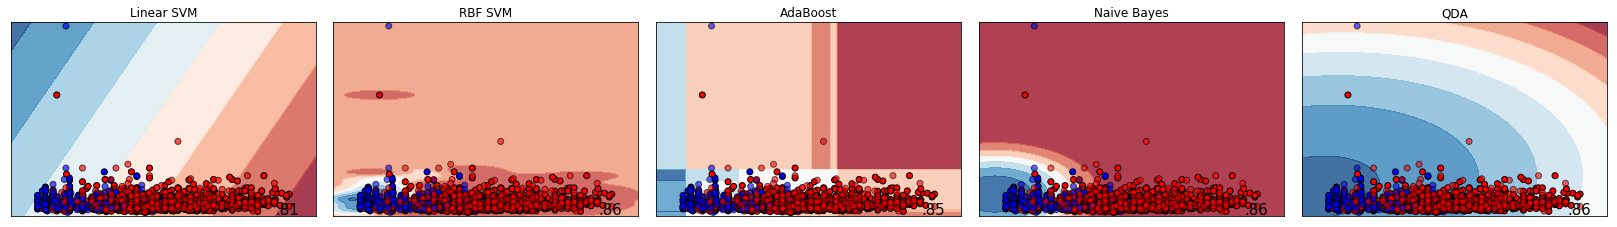

In [300]:
# https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#sphx-glr-auto-examples-classification-plot-classifier-comparison-py

print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

h = .02  # step size in the mesh

names = ["Linear SVM", "RBF SVM", "AdaBoost","Naive Bayes", "QDA"]

classifiers = [SVC(kernel="linear", C=0.025),SVC(gamma=2, C=1), AdaBoostClassifier(),GaussianNB(),QuadraticDiscriminantAnalysis()]

# names = ["Nearest Neighbors", "Linear SVM", "RBF SVM","Decision Tree", "Random Forest", "Neural Net", "AdaBoost","Naive Bayes", "QDA"]

# classifiers = [KNeighborsClassifier(3),SVC(kernel="linear", C=0.025),SVC(gamma=2, C=1),DecisionTreeClassifier(max_depth=5),RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),MLPClassifier(alpha=1),AdaBoostClassifier(),GaussianNB(),QuadraticDiscriminantAnalysis()]

col_list = ['InterestRate', 'MonthlyIncome', 'FICOBinary']

df = dataSetNoText[col_list]

df.columns = ['InterestRate', 'MonthlyIncome', 'FICOBinary']

X, y = df.drop('FICOBinary', axis=1), df.FICOBinary

figure = plt.figure(figsize=(27, 9))
i = 1

X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=42)
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
# just plot the dataset first
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
if ds_cnt == 0:
    ax.set_title("Input data")
# Plot the training points
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,edgecolors='k')
# Plot the testing points
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,edgecolors='k')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())

# iterate over classifiers
for name, clf in zip(names, classifiers):
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    if hasattr(clf, "decision_function"):
        Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    else:
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,edgecolors='k', alpha=0.6)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(name)
    ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),size=15, horizontalalignment='right')
    i += 1
    print(name)
    print(score)
plt.tight_layout()
plt.show()

# Random Forest - needs to be improved

# https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

# https://towardsdatascience.com/fine-tuning-a-classifier-in-scikit-learn-66e048c21e65

# https://medium.com/all-things-ai/in-depth-parameter-tuning-for-random-forest-d67bb7e920d


# https://chrisalbon.com/machine_learning/trees_and_forests/random_forest_classifier_example/

In [284]:
X=dataSetFICOClassification[['DebtToIncomeRatio', 'MonthlyIncome', 'OpenCREDITLines', 'RevolvingCREDITBalance', 'InquiriesintheLast6Months', 'EmploymentLength']]  # Features
y=dataSetFICOClassification['FICOclassification']  # Labels

In [285]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 

#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

score = clf.score(X_test, y_test)

print(score)

y_pred=clf.predict(X_test)

0.6762886597938145


In [286]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6721649484536083


In [287]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[  0,   1,   6,   0],
       [  0,   5,  75,   0],
       [  1,  11, 321,   2],
       [  0,   1,  62,   0]], dtype=int64)

In [288]:
# Another Random Forest Model

from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [289]:
import pandas as pd

feature_names = ['DebtToIncomeRatio', 'MonthlyIncome', 'OpenCREDITLines', 'RevolvingCREDITBalance', 'InquiriesintheLast6Months', 'EmploymentLength']

feature_imp = pd.Series(clf.feature_importances_,index=feature_names).sort_values(ascending=False)
feature_imp

RevolvingCREDITBalance       0.256984
DebtToIncomeRatio            0.247741
MonthlyIncome                0.201896
OpenCREDITLines              0.139521
EmploymentLength             0.089810
InquiriesintheLast6Months    0.064049
dtype: float64

No handles with labels found to put in legend.


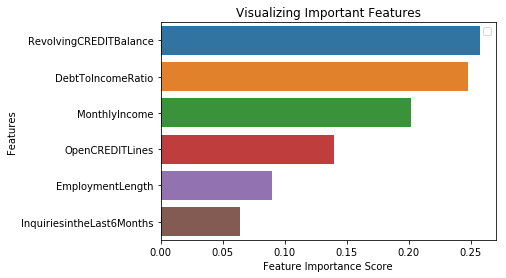

In [290]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [291]:
# Prune features with below .1 "Feature Importance Score"

In [292]:
pruneFICOdataSetColumns = ['DebtToIncomeRatio', 'MonthlyIncome', 'OpenCREDITLines', 'RevolvingCREDITBalance', 'FICOclassification']

prunedFICOdata = dataSetFICOClassification[pruneFICOdataSetColumns]

In [293]:
X=prunedFICOdata[['DebtToIncomeRatio', 'MonthlyIncome', 'OpenCREDITLines', 'RevolvingCREDITBalance']]  # Features
y=prunedFICOdata['FICOclassification']  # Labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 

#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6762886597938145


In [294]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[  0,   3,   6,   0],
       [  2,   8,  64,   1],
       [  0,  15, 319,   6],
       [  0,   2,  58,   1]], dtype=int64)

In [295]:
features = ['DebtToIncomeRatio', 'MonthlyIncome', 'OpenCREDITLines', 'RevolvingCREDITBalance']

feature_imp = pd.Series(clf.feature_importances_,index=features).sort_values(ascending=False)
feature_imp

RevolvingCREDITBalance    0.310113
DebtToIncomeRatio         0.298377
MonthlyIncome             0.240352
OpenCREDITLines           0.151159
dtype: float64

No handles with labels found to put in legend.


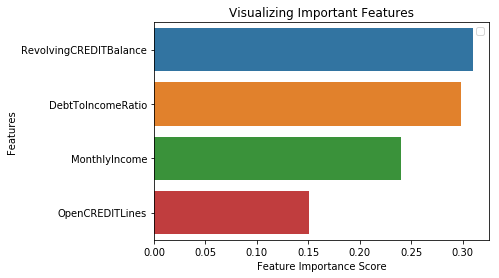

In [296]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [297]:
# Average Interest Rate by FICO Classification

# Exceptional: 800-850 = 1
# Very Good: 740-799 = 2
# Good: 670-739 = 3
# Fair: 580-669 = 4

exceptionalFICO = dataSetNoText[dataSetNoText["FICOclassification"] == 1]
verygoodFICO = dataSetNoText[dataSetNoText["FICOclassification"] == 2]
goodFICO = dataSetNoText[dataSetNoText["FICOclassification"] == 3]
fairFICO = dataSetNoText[dataSetNoText["FICOclassification"] == 4]

exceptionalFICOInterestRate = []
for i in range(0, len(exceptionalFICO)):
    exceptionalFICOInterestRate.append(exceptionalFICO['InterestRate'].iloc[i])
exceptionalFICOInterestRateAverage = sum(exceptionalFICOInterestRate) / len(exceptionalFICO)
print('exceptionalFICO average interest rate', exceptionalFICOInterestRateAverage)
print('exceptionalFICO max interest rate', max(exceptionalFICOInterestRate))
print('exceptionalFICO min interest rate', min(exceptionalFICOInterestRate))
print('exceptionalFICO 25% percentile interest rate', np.percentile(exceptionalFICOInterestRate, 25))
print('exceptionalFICO 75% percentile interest rate', np.percentile(exceptionalFICOInterestRate, 75))
print()

verygoodFICOInterestRate = []
for i in range(0, len(verygoodFICO)):
    verygoodFICOInterestRate.append(verygoodFICO['InterestRate'].iloc[i])
verygoodFICOInterestRateAverage = sum(verygoodFICOInterestRate) / len(verygoodFICO)
print('verygoodFICO average interest rate', verygoodFICOInterestRateAverage)
print('verygoodFICO max interest rate', max(verygoodFICOInterestRate))
print('verygoodFICO min interest rate', min(verygoodFICOInterestRate))
print('verygoodFICO 25% percentile interest rate', np.percentile(verygoodFICOInterestRate, 25))
print('verygoodFICO 75% percentile interest rate', np.percentile(verygoodFICOInterestRate, 75))
print()

goodFICOInterestRate = []
for i in range(0, len(goodFICO)):
    goodFICOInterestRate.append(goodFICO['InterestRate'].iloc[i])
goodFICOInterestRateAverage = sum(goodFICOInterestRate) / len(goodFICO)
print('goodFICO average interest rate', goodFICOInterestRateAverage)
print('goodFICO max interest rate', max(goodFICOInterestRate))
print('goodFICO min interest rate', min(goodFICOInterestRate))
print('goodFICO 25% percentile interest rate', np.percentile(goodFICOInterestRate, 25))
print('goodFICO 75% percentile interest rate', np.percentile(goodFICOInterestRate, 75))
print()

fairFICOInterestRate = []
for i in range(0, len(fairFICO)):
    fairFICOInterestRate.append(fairFICO['InterestRate'].iloc[i])
fairFICOInterestRateAverage = sum(fairFICOInterestRate) / len(fairFICO)
print('fairFICO average interest rate', fairFICOInterestRateAverage)
print('fairFICO max interest rate', max(fairFICOInterestRate))
print('fairFICO min interest rate', min(fairFICOInterestRate))
print('fairFICO 25% percentile interest rate', np.percentile(fairFICOInterestRate, 25))
print('fairFICO 75% percentile interest rate', np.percentile(fairFICOInterestRate, 75))
print()

exceptionalFICO average interest rate 7.656578947368423
exceptionalFICO max interest rate 11.83
exceptionalFICO min interest rate 5.42
exceptionalFICO 25% percentile interest rate 6.62
exceptionalFICO 75% percentile interest rate 7.9

verygoodFICO average interest rate 8.695524999999998
verygoodFICO max interest rate 17.27
verygoodFICO min interest rate 5.42
verygoodFICO 25% percentile interest rate 6.62
verygoodFICO 75% percentile interest rate 10.38

goodFICO average interest rate 13.482194979568103
goodFICO max interest rate 24.7
goodFICO min interest rate 5.79
goodFICO 25% percentile interest rate 11.14
goodFICO 75% percentile interest rate 15.65

fairFICO average interest rate 17.76259259259259
fairFICO max interest rate 24.89
fairFICO min interest rate 11.14
fairFICO 25% percentile interest rate 15.492499999999998
fairFICO 75% percentile interest rate 19.7125



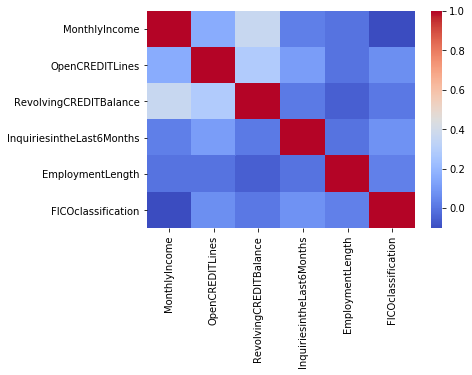

In [298]:
g = sns.heatmap(dataSetFICOClassification.corr(),annot=False, fmt = ".2f", cmap = "coolwarm")

In [115]:
# Credit Score Models 
# https://github.com/IdoZehori/Credit_Score
# https://github.com/max-fitzpatrick/Credit-scoring-model

# Alternative Credit Score

In [113]:
# The purpose of the FICO score

# From https://www.investopedia.com/terms/f/ficoscore.asp

# https://www.thebalance.com/how-your-credit-score-influences-your-interest-rate-960278

print("Lenders use borrowers' FICO scores along with other details on borrowers' credit reports to assess credit risk and determine whether to extend credit.")
print("")
print("Additionally, this score is a huge component of what determines the interest rate on a loan that a borrower would get.")

Lenders use borrowers' FICO scores along with other details on borrowers' credit reports to assess credit risk and determine whether to extend credit.

Additionally, this score is a huge component of what determines the interest rate on a loan that a borrower would get.


In [ ]:
# Sources and Literary Background
# https://www.fdic.gov/bank/analytical/cfr/2018/wp2018/cfr-wp2018-04.pdf
# https://digitalcommons.law.yale.edu/cgi/viewcontent.cgi?article=1122&context=yjolt
# https://medium.com/f4life/machine-learning-meets-credit-scoring-how-it-can-help-reduce-loan-delinquency-costs-bf6eb6b28aea
# https://www2.deloitte.com/content/dam/Deloitte/global/Documents/Financial-Services/gx-be-aers-fsi-credit-scoring.pdf
# https://evans.uw.edu/policy-impact/epar/blog/digital-credit-emerging-market
# https://medium.com/henry-jia/how-to-score-your-credit-1c08dd73e2ed
# https://scholarworks.sjsu.edu/cgi/viewcontent.cgi?referer=https://www.google.com/&httpsredir=1&article=1532&context=etd_projects

In [150]:
# Given the results seen above, one option for a new credit score would be a factor based approach, stitching together some 
# of the results seen above

In [304]:
# Just do a factor based approach for this with if/else and percentiles of the important values in random forest to 
# determine what interest rate they would get

# Since interest rates are very similar above 740 FICO, we need to figure out the range of relationship between 
# good and fair FICOs to then be able to back into an appropriate interest rate. 

# Will be a difficult problem to optimize for